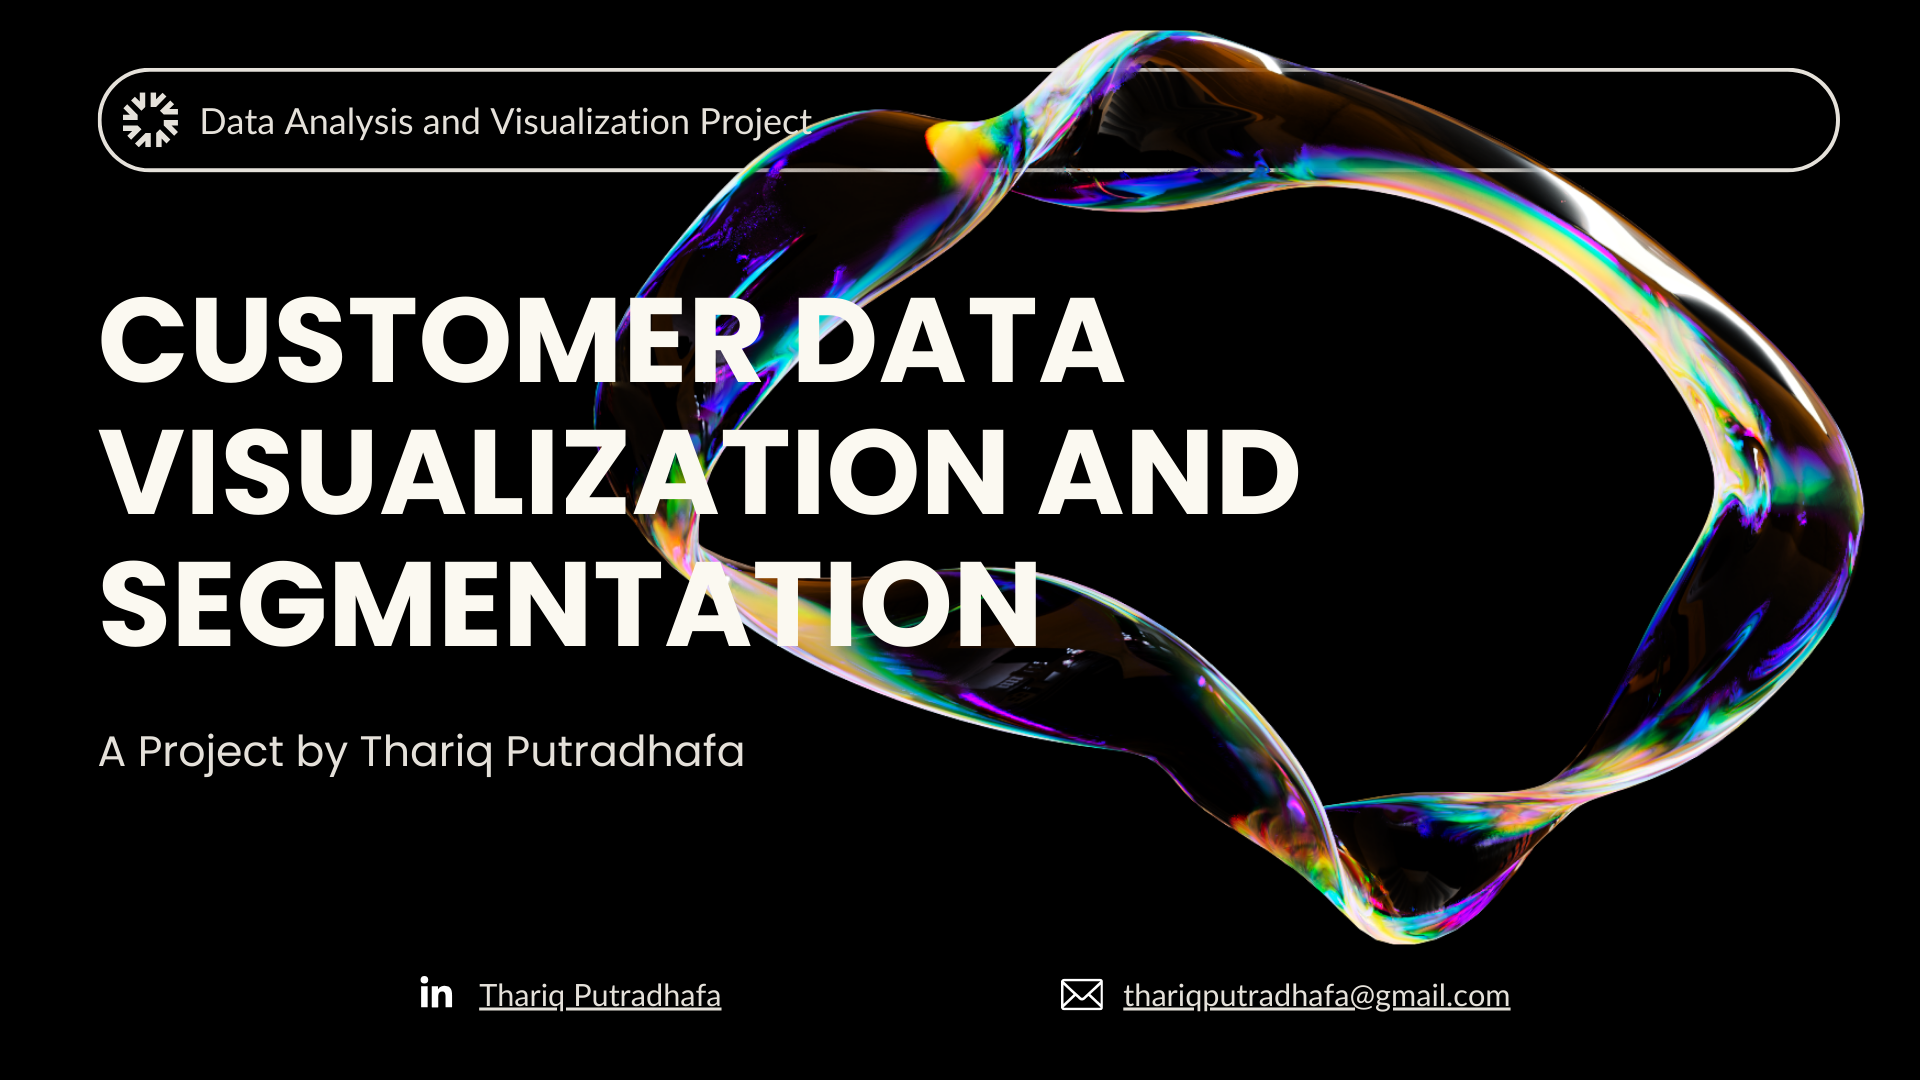

##Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Importing Data

In [2]:
df = pd.read_csv('/content/data.csv', encoding = 'ISO-8859-1')

##Showing Slight Info about the data

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<h1>What can we conclude from the data</h1>

#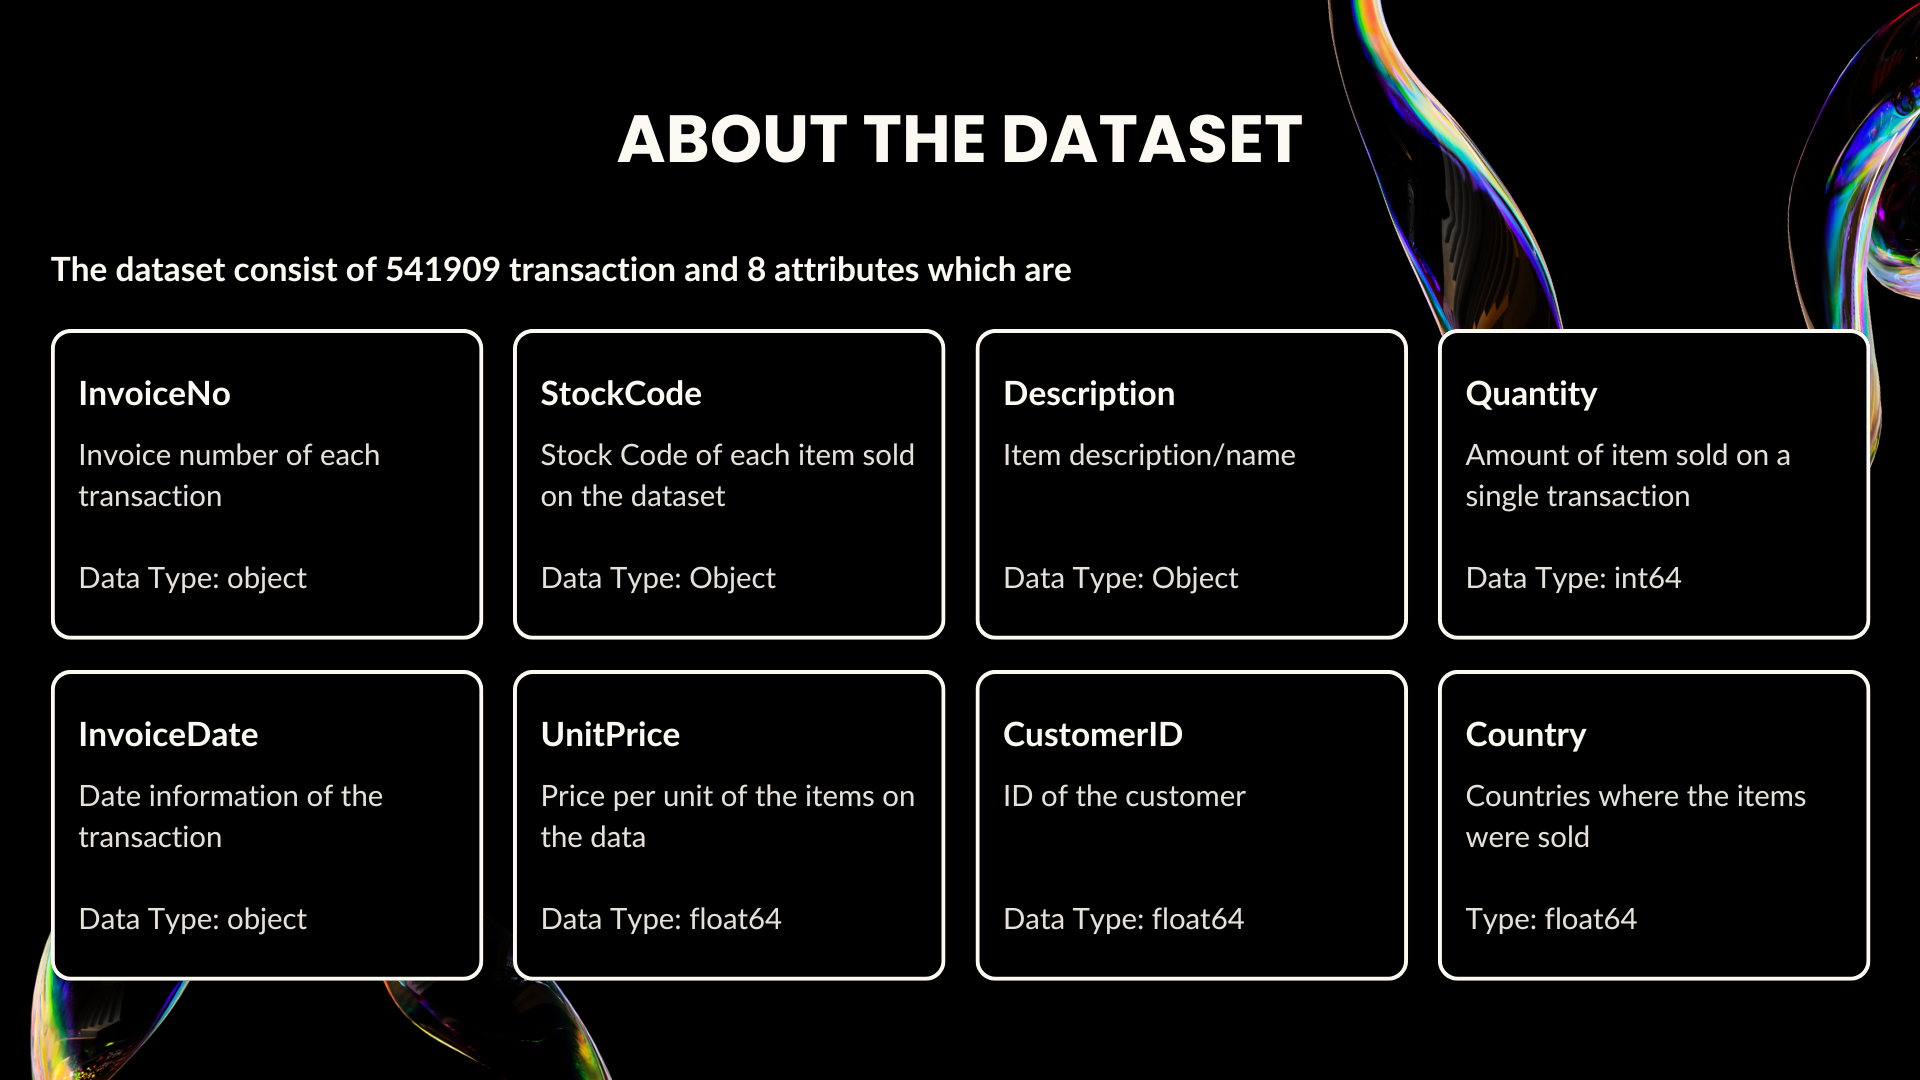

#Data Preprocessing

###Deleting rows with empty customer ID

Removing rows with missing CustomerID is important to ensure accurate and relevant analysis. The CustomerID column is a unique identifier for customers, so missing values mean the transaction cannot be linked to anyone. Including these rows can distort results, such as total spending or clustering analysis. Removing them improves data quality, ensures accuracy, and focuses only on identifiable customers. Alternatively, transactions without a CustomerID can be analyzed separately, such as for anonymous purchases.

In [5]:
data_clean = df.dropna(subset=['CustomerID'])

###Converting Invoice date to Datetime format

<p> Conversion of the InvoiceDate Column are used to fully utilize the information of the data provided on the column so that there are no missing information from the data

In [6]:
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])

<ipython-input-6-aee37880cc38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])


###Adding total Price column to the dataset

<p>TotalPrice Column are used to count the total sales of the item by multiplying quantity with unitprice so that we can get a total price per transaction.

In [7]:
data_clean['TotalPrice'] = data_clean['Quantity'] * data_clean['UnitPrice']

<ipython-input-7-1724f7b8e4e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['TotalPrice'] = data_clean['Quantity'] * data_clean['UnitPrice']


####Checking data Types and Columns after preprocessing

In [8]:
data_clean.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
TotalPrice,float64


#Product with highest selling
####Goal: To find the top selling product based on its quantity

####Group by products and quantity

In [9]:
top_products= (
data_clean.groupby(['StockCode', 'Description'])['Quantity']
.sum()
.reset_index()
.sort_values(by='Quantity', ascending=False)
.head(10)
)

####Show top-10 products

In [10]:
print(top_products)

     StockCode                         Description  Quantity
3028     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
3460    85099B             JUMBO BAG RED RETROSPOT     45066
3288     84879       ASSORTED COLOUR BIRD ORNAMENT     35314
3475    85123A  WHITE HANGING HEART T-LIGHT HOLDER     34147
434      21212     PACK OF 72 RETROSPOT CAKE CASES     33409
1112     22197                      POPCORN HOLDER     30504
2010     23084                  RABBIT NIGHT LIGHT     27094
1387     22492             MINI PAINT SET VINTAGE      25880
1509     22616          PACK OF 12 LONDON TISSUES      25321
930      21977  PACK OF 60 PINK PAISLEY CAKE CASES     24163


Visualize top-10 products

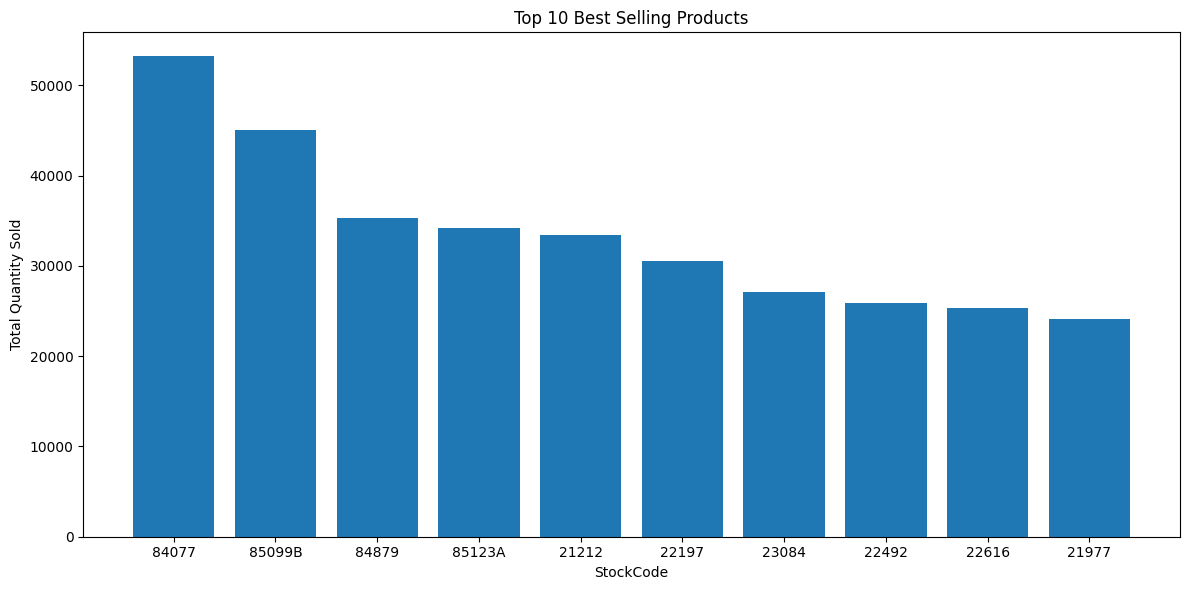

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(top_products['StockCode'], top_products['Quantity'])
plt.xlabel("StockCode")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Best Selling Products")
plt.tight_layout()
plt.show()

#Selling analysis by Country

<p>Goal: To find which country has the most sales and what products that affect sales the most</p>

####Group by Country and Total Price

In [12]:
sales_by_country = (
    data_clean.groupby('Country')['TotalPrice']
    .sum()
    .reset_index()
    .sort_values(by='TotalPrice', ascending=False)
)

print("Selling per country:")
print(sales_by_country)

Selling per country:
                 Country   TotalPrice
35        United Kingdom  6767873.394
23           Netherlands   284661.540
10                  EIRE   250285.220
14               Germany   221698.210
13                France   196712.840
0              Australia   137077.270
32           Switzerland    55739.400
30                 Spain    54774.580
3                Belgium    40910.960
31                Sweden    36595.910
19                 Japan    35340.620
24                Norway    35163.460
26              Portugal    29059.810
12               Finland    22326.740
6        Channel Islands    20086.290
9                Denmark    18768.140
18                 Italy    16890.510
7                 Cyprus    12946.290
1                Austria    10154.320
29             Singapore     9120.390
25                Poland     7213.140
17                Israel     6994.250
15                Greece     4710.520
16               Iceland     4310.000
5                 Canada     

###Displaying Country selling analysis by map with plotly.express

<p>To understand the distribution better, we can display the sales analysis with plotly.express to vsiualize the distribution map of the sales.

We also do notice that the names of the country data are inconsistent which would cause errors in the map visualization. Lets fix that with ISO Alpha-3 codes to make the data format readable by chropleth.

###We notice that there are some unspecified country and european community countries that consist of Belgium, France, Germany, Italy, Luxembourg, and the Netherlands. Let's remove the unspecified for the choropleth to work better.

In [21]:
sales_by_country['CountryCode'] = sales_by_country['Country'].map({
    "United Kingdom": "GBR",
    "Netherlands": "NLD",
    "EIRE": "IRL",
    "Germany": "DEU",
    "France": "FRA",
    "Australia": "AUS",
    "Switzerland": "CHE",
    "Spain": "ESP",
    "Belgium": "BEL",
    "Sweden": "SWE",
    "Japan": "JPN",
    "Norway": "NOR",
    "Portugal": "PRT",
    "Finland": "FIN",
    "Channel Islands": "GBR",
    "Denmark": "DNK",
    "Italy": "ITA",
    "Cyprus": "CYP",
    "Austria": "AUT",
    "Singapore": "SGP",
    "Poland": "POL",
    "Israel": "ISR",
    "Greece": "GRC",
    "Iceland": "ISL",
    "Canada": "CAN",
    "Malta": "MLT",
    "United Arab Emirates": "ARE",
    "USA": "USA",
    "Lebanon": "LBN",
    "Lithuania": "LTU",
    "Brazil": "BRA",
    "RSA": "ZAF",
    "Czech Republic": "CZE",
    "Bahrain": "BHR",
    "Saudi Arabia": "SAU"
})

In [22]:
# Remove rows where any column has the value "unspecified"
sales_by_country_cleaned = sales_by_country[~sales_by_country.isin(["Unspecified", "European Community"]).any(axis=1)]

print("\nDataFrame after removing rows with 'unspecified':")
print(sales_by_country_cleaned)


DataFrame after removing rows with 'unspecified':
                 Country   TotalPrice CountryCode
35        United Kingdom  6767873.394         GBR
23           Netherlands   284661.540         NLD
10                  EIRE   250285.220         IRL
14               Germany   221698.210         DEU
13                France   196712.840         FRA
0              Australia   137077.270         AUS
32           Switzerland    55739.400         CHE
30                 Spain    54774.580         ESP
3                Belgium    40910.960         BEL
31                Sweden    36595.910         SWE
19                 Japan    35340.620         JPN
24                Norway    35163.460         NOR
26              Portugal    29059.810         PRT
12               Finland    22326.740         FIN
6        Channel Islands    20086.290         GBR
9                Denmark    18768.140         DNK
18                 Italy    16890.510         ITA
7                 Cyprus    12946.290         CYP

In [25]:
# Scale down the UK value specifically
import plotly.express as px

sales_by_country['AdjustedTotalPrice'] = sales_by_country['TotalPrice']
sales_by_country.loc[sales_by_country['CountryCode'] == 'GBR', 'AdjustedTotalPrice'] = 500000

fig = px.choropleth(
    sales_by_country,
    locations='CountryCode',
    locationmode='ISO-3',
    color='AdjustedTotalPrice',
    hover_name='Country',
    title='Sales Analysis by Country (UK Adjusted)',
    color_continuous_scale=px.colors.sequential.Blues
)
fig.update_layout(coloraxis_colorbar=dict(title="TotalPrice (UK Adjusted)"))
fig.show()

We have a problem on visualizing the data of Sales Analysis by country. The UK Total Sells which is 6767873.394 causes an upnormality of the color spectrum where the color can't be displayed properly due to far range between first rank and second rank. We adjusted the value of UK total sells so that the map can be displayed properly.

As we can see on the map, the market is dominated by european countries which led by United Kingdon, followed by Netherlands, Ireland etc. From the west we have buyers from USA, Canada, and Brazil on with moderate amount of purchase. From Asia and Africa we have Saudi Arabia and Republic of South Africa who have a selling on our products. Last but not least, Australia have a good market for our product which place them among our loyal and royal european country customers.

###Most sold item in United Kingdom

<p>We can conclude that the country with most sold items are in United Kingdom, what is the most sold item in UK?</p>

In [27]:
most_sold_item_UK = (
    data_clean[data_clean['Country'] == 'United Kingdom']
    .groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
)

print("Most Sold Item in the UK:")
print(most_sold_item_UK.head(1))

Most Sold Item in the UK:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    47982
Name: Quantity, dtype: int64


###Most Sold item in the whole world

<p>People do love World War 2 Gliders ASSTD Designs, what about the most sold item in the whole world?

In [ ]:
most_sold_item_world = (
    data_clean.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
)

print("Most Sold Item in the World:")
print(most_sold_item_world.head(1))

Most Sold Item in the World:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    28708.0
Name: Quantity, dtype: float64


From the analysis above, we can conclude that WORLD WAR 2 GLIDERS ASSTD DESIGNS are the top selling items in the world with most sales in United Kingdom

#Best Customer Identification
####Goal: To find customer with highest Total Price based on the customer ID and the total Price

In [13]:
import pandas as pd

# Group by 'CustomerID' and 'Country', then calculate total spending
customer_spending = data_clean.groupby(['CustomerID', 'Country'])['TotalPrice'].sum().reset_index()

# Add a ranking column based on descending total spending
customer_spending['Rank'] = customer_spending['TotalPrice'].rank(ascending=False, method='dense').astype(int)

# Sort customers by rank
customer_spending = customer_spending.sort_values(by='Rank')

# Reset index for better readability
customer_spending.reset_index(drop=True, inplace=True)

# Display the top customers
print(customer_spending.head(10))  # Top 10 customers

   CustomerID         Country  TotalPrice  Rank
0     14646.0     Netherlands   279489.02     1
1     18102.0  United Kingdom   256438.49     2
2     17450.0  United Kingdom   187482.17     3
3     14911.0            EIRE   132572.62     4
4     12415.0       Australia   123725.45     5
5     14156.0            EIRE   113384.14     6
6     17511.0  United Kingdom    88125.38     7
7     16684.0  United Kingdom    65892.08     8
8     13694.0  United Kingdom    62653.10     9
9     15311.0  United Kingdom    59419.34    10


#Customer Segmentation Clustering

####Goal: Group customers based on their purchasing patterns to find different customer segments.

Import libraries needed

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [15]:
# Data Aggregation for every customers
customer_data = data_clean.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Showing Customer Data
customer_data.head()

,CustomerID,Quantity,TotalPrice
0,12346.0,0,0.00
1,12347.0,2458,4310.00
2,12348.0,2341,1797.24
3,12349.0,631,1757.55
4,12350.0,197,334.40


In [16]:
# Choose features for clustering
features = customer_data[['Quantity', 'TotalPrice']]

# Nomrmalize the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### Determining the number of clusters using elbow method

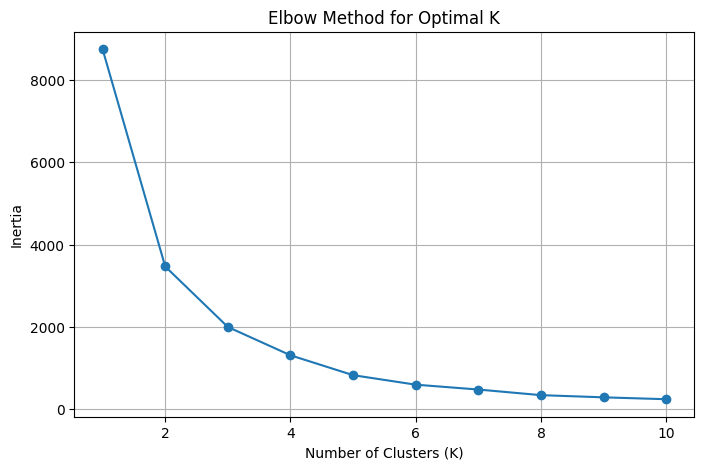

In [17]:
# Test several K values by using loop
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

<p> From the plot above we can conclude that the best number of clusters for this data is 3 which can be determined by the elbow point which is the point where adding another cluster does not provide a significant reduction in inertia compared to previous steps.</p>

####K-Means Clustering

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Print the clustering result
customer_data.head()

,CustomerID,Quantity,TotalPrice,Cluster
0,12346.0,0,0.00,0
1,12347.0,2458,4310.00,0
2,12348.0,2341,1797.24,0
3,12349.0,631,1757.55,0
4,12350.0,197,334.40,0


In [19]:
# Print centroid for each clusters
kmeans.cluster_centers_

array([[-0.06276095, -0.06013192],
       [20.49032631, 23.61079652],
       [ 6.293737  ,  5.29327976]])

##Clustering Visualization an evaluation

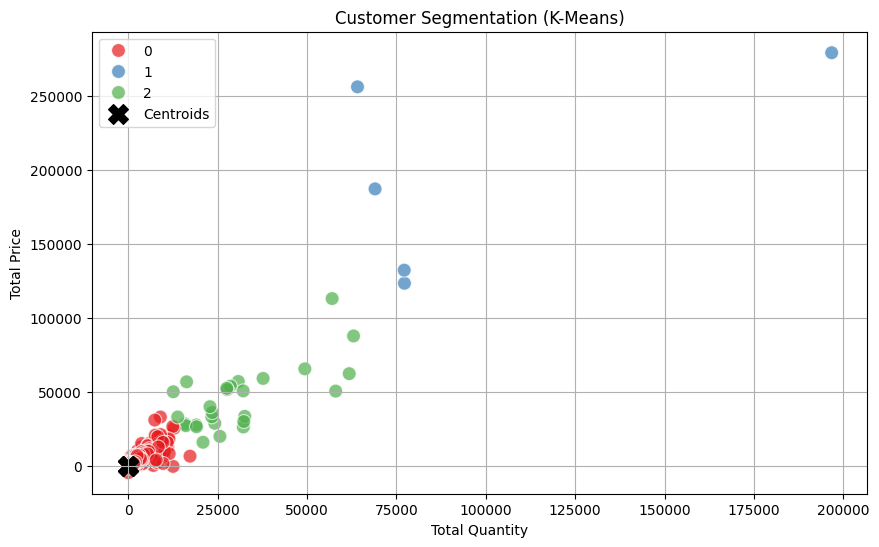

Silhouette Score: 0.9561
Davies-Bouldin Index: 0.5763
Calinski-Harabasz Index: 7372.8813


In [20]:
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Clustering scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Quantity', y='TotalPrice',
    hue='Cluster', data=customer_data,
    palette='Set1', s=100, alpha=0.7
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    color='black', marker='X', s=200, label='Centroids'
)
plt.title('Customer Segmentation (K-Means)')
plt.xlabel('Total Quantity')
plt.ylabel('Total Price')
plt.legend()
plt.grid()
plt.show()

# Silhouette Score
silhouette_avg = silhouette_score(scaled_features, customer_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Davies-Bouldin Index
dbi = davies_bouldin_score(scaled_features, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {dbi:.4f}")

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(scaled_features, customer_data['Cluster'])
print(f"Calinski-Harabasz Index: {ch_score:.4f}")

From the customer segmentation above, we can see that the customer are segemented into three clusters. The clusters represented by Cluster 0 (Red), Cluster 1 (Green) and Cluster 3 (Blue).

1.   Cluster 0 are the customers who likely to be infrequent buyers or low-value customers which represents the majority of small-scale or casual customer.
2.   Cluster 1 are the customers who buys moderate item quantity and moderate total price per transaction. These customers are likely to be a regular customer which contribute a significant value to the business
3.   Cluster 3 are the customers who have a high total quantity and total price and these are the customers who make large transaction. This cluster of customers are relatively low compared to the other cluster but this cluster are highly profitable customers

Strategic Implications
1.   Focusing on Cluster 2
     These customers are crucial for revenue generation. Investation on loyalty program, rewards are totally worth it. Based on the customer quantity of the cluster 2, we can also have personalized interaction since there are not much of these customers to keep them loyal to the business
2.   Engage Cluster 0
     Customers in cluster 0 are potential loyal customers in the future. The strategy we can use is to create a campaign, loyalty program or cross selling program to introduce our products even more.
3.   Retain Cluster 1
     These customers are the backbone of your business. Provide consistent value and engagement to ensure their loyalty.

Scores Explanation:
*   Silhouette Score (0.9561): Strong intra-cluster cohesion and separation.
*   Davies-Bouldin Index (0.5763): Minimal overlap between clusters.
*   Calinski-Harabasz Index (7372.8813): Well-separated and compact clusters.










#Conclusion

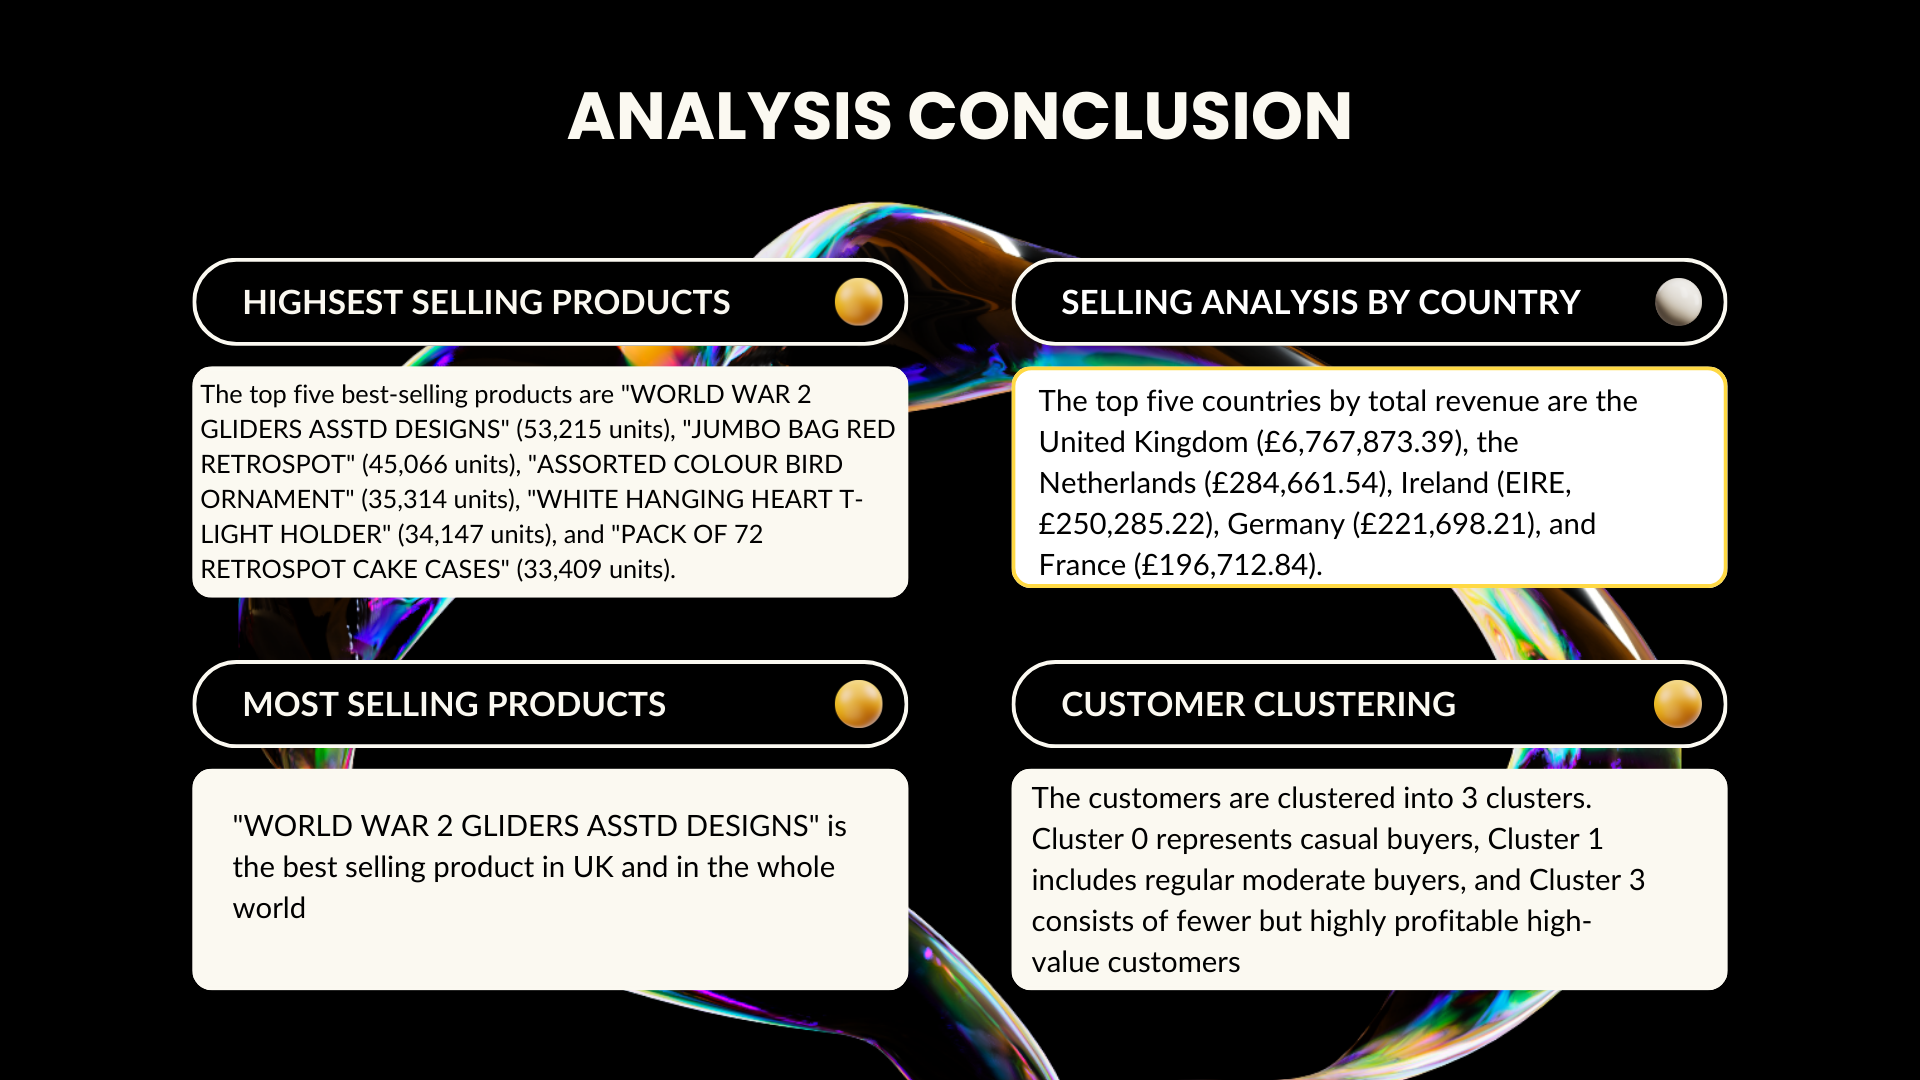